# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings("ignore") # Eliminando warnings. Gracias al buen Max que me enseñó :D

In [87]:
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3] })
student_data.set_index('StudentID', inplace = True)
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

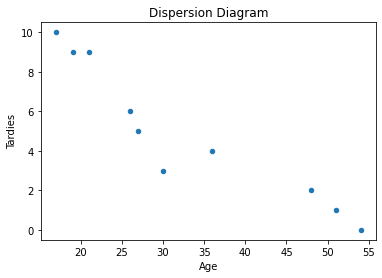

In [88]:
student_data.plot.scatter(x='Age', y='Tardies')
plt.title('Dispersion Diagram');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

##### <font color='darkblue'>Efectivamente se ve una tendencia. Podemos ver que la pendiente es negativa, es decir, a medida que aumenta la edad, disminuye 'Tardies'.</font>

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [89]:
f"La covarianza es {student_data.cov()['Age'][1].round(2)} y la correlación es {student_data.corr()['Age'][1].round(2)}"

'La covarianza es -45.57 y la correlación es -0.94'

##### <font color='darkblue'>El que tanto la covarianza como la correlación sean negativos, significa que nuestras variables se mueven de forma inversa, es decir, mientras una aumenta la otra disminuye.</font>

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [90]:
X=sm.add_constant(student_data.Age)
y=student_data.Tardies
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           5.57e-05
Time:                        21:43:33   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

##### <font color='darkblue'>Nuestra outcome variable será el número de atrasos.</font>
##### <font color='darkblue'>Utilizaremos regresiones lineales ya que así parecen comportarse los datos según el gráfico anterior.</font>

Plot your regression model on your scatter plot.

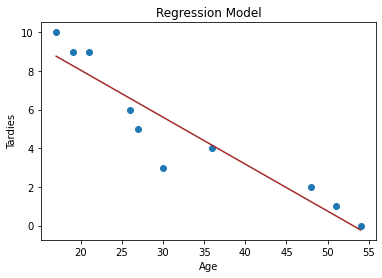

In [91]:
slope=-0.2428
intercept=12.8888
plt.scatter(student_data.Age, student_data.Tardies)
x=[student_data.Age.min(),student_data.Age.max()]
y=[student_data.Age.min()*slope + intercept, student_data.Age.max()*slope + intercept]
plt.plot(x,y,color='brown')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Model');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [92]:
f'p-value {1-5.57e-05}'

'p-value 0.9999443'

##### <font color='darkblue'>Para concluir, podemos decir que la edad sí es un un predictor de los atrasos. En 1er lugar tenemos el p-value, que nos indica que con un 99.99% de confianza, podemos rechazar la Ho (el promedio de atrasaos es el mismo independiente de la edad). En 2do lugar, nuestro R-squared nos indica que el modelo captura el 88.2% de la variación de los datos. Y en 3er lugar, en nuestro gráfico podemos ver que los datos no se alejan tanto de la 'línea'.</font>

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [93]:
df = pd.read_csv('./vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [94]:
# Your response here.
y=df['CO2 Emission Grams/Mile']
df1 = df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
df1.corr()[['CO2 Emission Grams/Mile']].sort_values(by='CO2 Emission Grams/Mile',ascending=False)[1:]

,CO2 Emission Grams/Mile
Fuel Barrels/Year,0.986189
Fuel Cost/Year,0.930865
Cylinders,0.752393
Year,-0.222300
Combined MPG,-0.926229


##### <font color='darkblue'>Las variables que más nos servirán para determinar las emisiones de CO2 dada su correlación son: Fuel Barrels/Year, Fuel Cost/Year y Combined MPG.</font>

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [95]:
x=sm.add_constant(df1[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']])
df = sm.OLS(y, x).fit()
print(df.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                             21:43:37   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

##### <font color='darkblue'>La variable más importante de nuestro modelo es Fuel Barrels/Year, ya que si le sumamos 1 punto al 'índice', nuestra 'y' o variable dependiente (outcome variable) aumentaría 19.05 veces aproximadamente, siendo la variable que más influiría en el resultado. </font>

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 